In [1]:
#Load the desired libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
"""Since we want to download crypto data for Binance,Bitcoin,Etherium and XRP(Ripple).    
   We will use their ticker symbols BNB,BTC,ETH,XRP."""

crypto_curr = ['BNB-USD','BTC-USD', 'ETH-USD', 'XRP-USD']


In [3]:
"""We want to see the changes in the crypto market since the for the second Covid-19 wave in India. 
   Thus the start date is 13 March 2021 and the end date is 19 June 2021."""

data = yf.download(crypto_curr, start='2021-03-13',
                end='2021-06-19')

data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                       \
                              BNB-USD       BTC-USD      ETH-USD   XRP-USD   
Date                                                                         
2021-03-13 00:00:00+00:00  276.104706  61243.085938  1924.685425  0.459924   
2021-03-14 00:00:00+00:00  264.636749  59302.316406  1854.564331  0.442112   
2021-03-15 00:00:00+00:00  254.660828  55907.199219  1791.702271  0.437555   
2021-03-16 00:00:00+00:00  258.100677  56804.902344  1806.971802  0.462600   
2021-03-17 00:00:00+00:00  269.854858  58870.894531  1823.449341  0.472417   

                                Close                                       \
                              BNB-USD       BTC-USD      ETH-USD   XRP-USD   
Date                                                                         
2021-03-13 00:00:00+00:00  276.104706  61243.085938  1924.685425  0.459924   
2021-03-14 00:00:00+00:00  264.636749  59302.316406  1854.564331  0.442112   
2021-03-15 00:00:00+00:00  254.660828  55907.199219  1791.702271  0.437555   
2021-03-16 00:00:00+00:00  258.100677  56804.902344  1806.971802  0.462600   
2021-03-17 00:00:00+00:00  269.854858  58870.894531  1823.449341  0.472417   

                                 High                ...          Low  \
                              BNB-USD       BTC-USD  ...      ETH-USD   
Date                                                 ...                
2021-03-13 00:00:00+00:00  283.013611  61683.863281  ...  1733.639893   
2021-03-14 00:00:00+00:00  276.371246  61597.917969  ...  1845.119995   
2021-03-15 00:00:00+00:00  267.233734  60540.992188  ...  1749.606323   
2021-03-16 00:00:00+00:00  258.876129  56833.179688  ...  1720.053223   
2021-03-17 00:00:00+00:00  270.962891  58969.816406  ...  1749.179932   

                                           Open                             \
                            XRP-USD     BNB-USD       BTC-USD      ETH-USD   
Date                                                                         
2021-03-13 00:00:00+00:00  0.435522  263.592010  57343.371094  1772.166382   
2021-03-14 00:00:00+00:00  0.442112  276.185730  61221.132812  1923.863770   
2021-03-15 00:00:00+00:00  0.426547  264.063507  59267.429688  1854.086670   
2021-03-16 00:00:00+00:00  0.430078  254.450439  55840.785156  1792.413818   
2021-03-17 00:00:00+00:00  0.457061  258.385864  56825.828125  1807.056152   

                                         Volume                            \
                            XRP-USD     BNB-USD      BTC-USD      ETH-USD   
Date                                                                        
2021-03-13 00:00:00+00:00  0.441109  2903774859  60669829814  25014689475   
2021-03-14 00:00:00+00:00  0.459631  2044273970  43901225564  19344589211   
2021-03-15 00:00:00+00:00  0.442087  2488528410  66419369890  26244738810   
2021-03-16 00:00:00+00:00  0.437454  2425543830  59749798599  23828509590   
2021-03-17 00:00:00+00:00  0.462822  2271426252  60258313191  24512917348   

                                       
                              XRP-USD  
Date                                   
2021-03-13 00:00:00+00:00  3212270555  
2021-03-14 00:00:00+00:00  2509435800  
2021-03-15 00:00:00+00:00  3116009271  
2021-03-16 00:00:00+00:00  7382009786  
2021-03-17 00:00:00+00:00  4341765347  

[5 rows x 24 columns]

In [4]:
# check for missing data
data.isnull().any()

Adj Close  BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Close      BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
High       BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Low        BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Open       BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Volume     BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
dtype: bool

In [5]:
"""
Feature description

    Date: date of observation
    Open: The opening price
    High: Highest price
    Low: Lowest price
    Close: The closing price
    Adj Close: The closing price after adjustments for splits and dividend
    Volume: Total stocks traded
"""

'\nFeature description\n\n    Date: date of observation\n    Open: The opening price\n    High: Highest price\n    Low: Lowest price\n    Close: The closing price\n    Adj Close: The closing price after adjustments for splits and dividend\n    Volume: Total stocks traded\n'

In [6]:
#We would take adjusted close price of our cryptocurrencies
adj_close=data['Adj Close']
adj_close.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2021-03-13 00:00:00+00:00,276.104706,61243.085938,1924.685425,0.459924
2021-03-14 00:00:00+00:00,264.636749,59302.316406,1854.564331,0.442112
2021-03-15 00:00:00+00:00,254.660828,55907.199219,1791.702271,0.437555
2021-03-16 00:00:00+00:00,258.100677,56804.902344,1806.971802,0.462600
2021-03-17 00:00:00+00:00,269.854858,58870.894531,1823.449341,0.472417


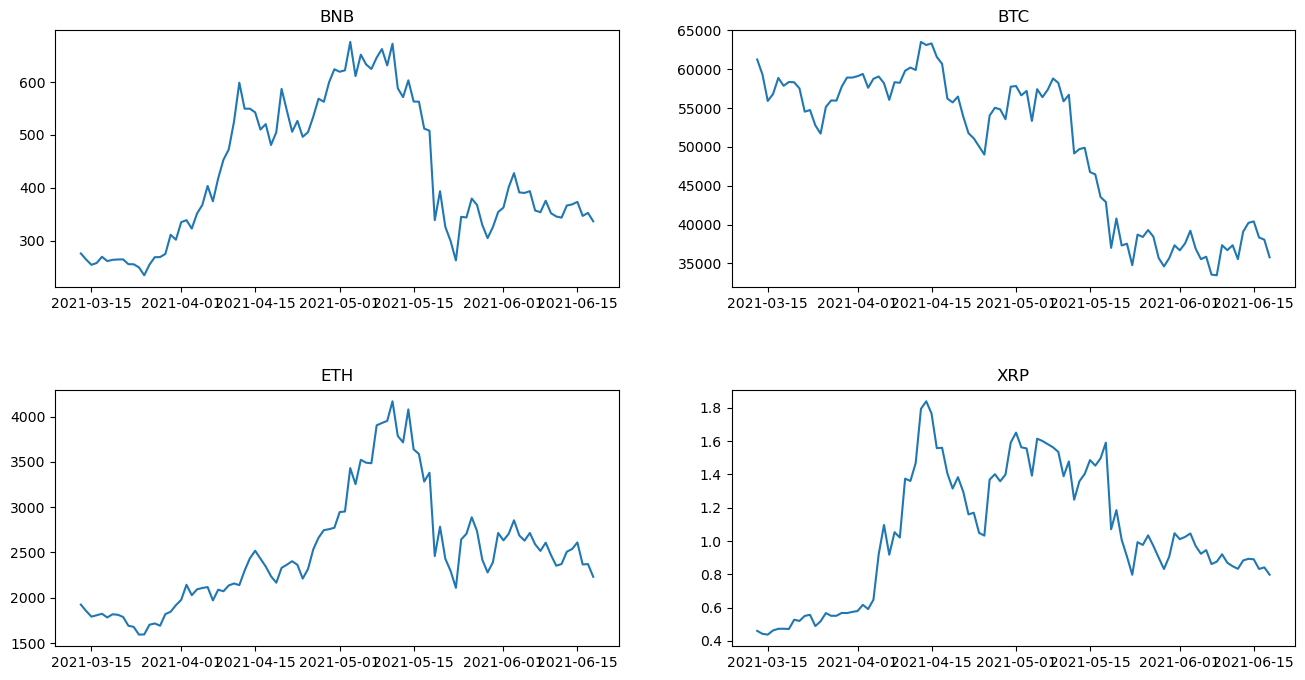

In [7]:
"""
We’ll plot the adjusted closing price. 
We use subplots since the cryptocurrencies are on different scales.
"""

# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.4, 'wspace': 0.2})
axs[0,0].plot(adj_close['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(adj_close['XRP-USD'])
axs[1,1].set_title('XRP')
plt.show()

In [8]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2021-03-14 00:00:00+00:00,-0.041535,-0.031690,-0.036432,-0.038728
2021-03-15 00:00:00+00:00,-0.037697,-0.057251,-0.033896,-0.010307
2021-03-16 00:00:00+00:00,0.013508,0.016057,0.008522,0.057239
2021-03-17 00:00:00+00:00,0.045541,0.036370,0.009119,0.021221
2021-03-18 00:00:00+00:00,-0.030202,-0.017190,-0.022262,0.001063


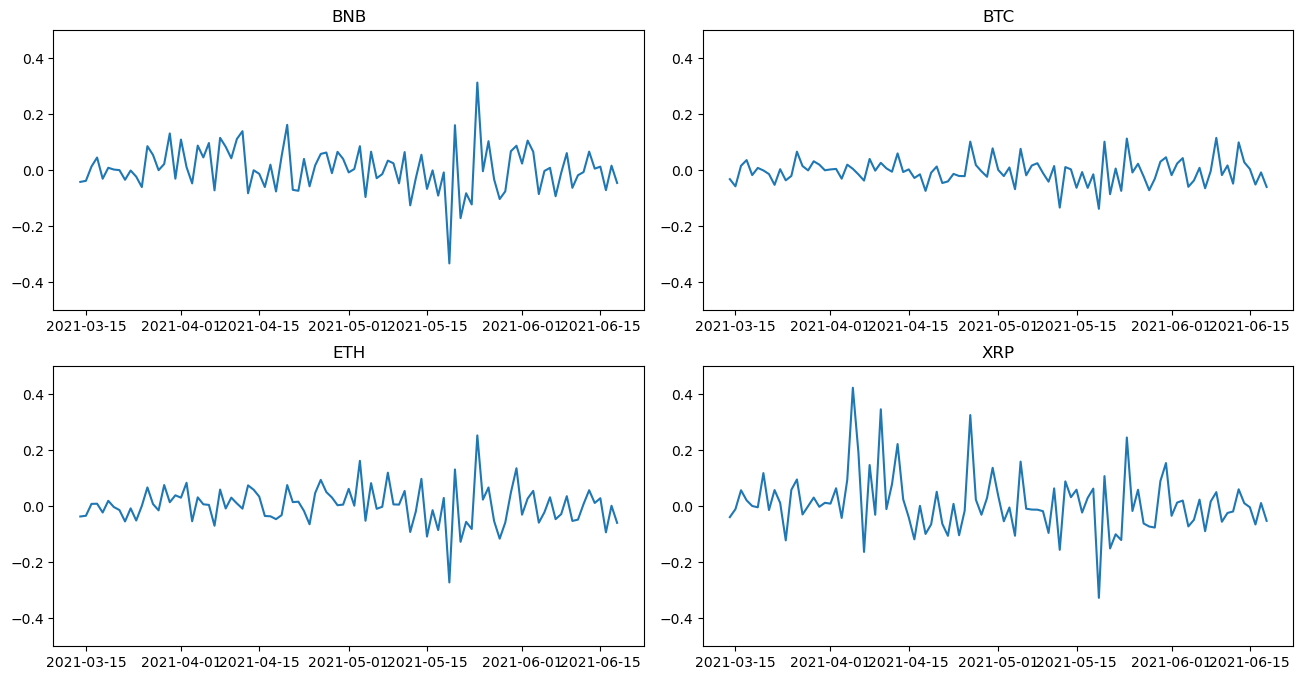

In [9]:
#ploting the returns
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['XRP-USD'])
axs[1,1].set_title('XRP')
axs[1,1].set_ylim([-0.5,0.5])
plt.show()

In [10]:
#volatility, standard deviation of the returns
returns.std()

BNB-USD    0.082034
BTC-USD    0.046008
ETH-USD    0.067736
XRP-USD    0.106606
dtype: float64

In [11]:
"""From the above analysis , we can see that XRP(Ripple) is the most volatile while Bitcoin is the least volatile"""

'From the above analysis , we can see that XRP(Ripple) is the most volatile while Bitcoin is the least volatile'

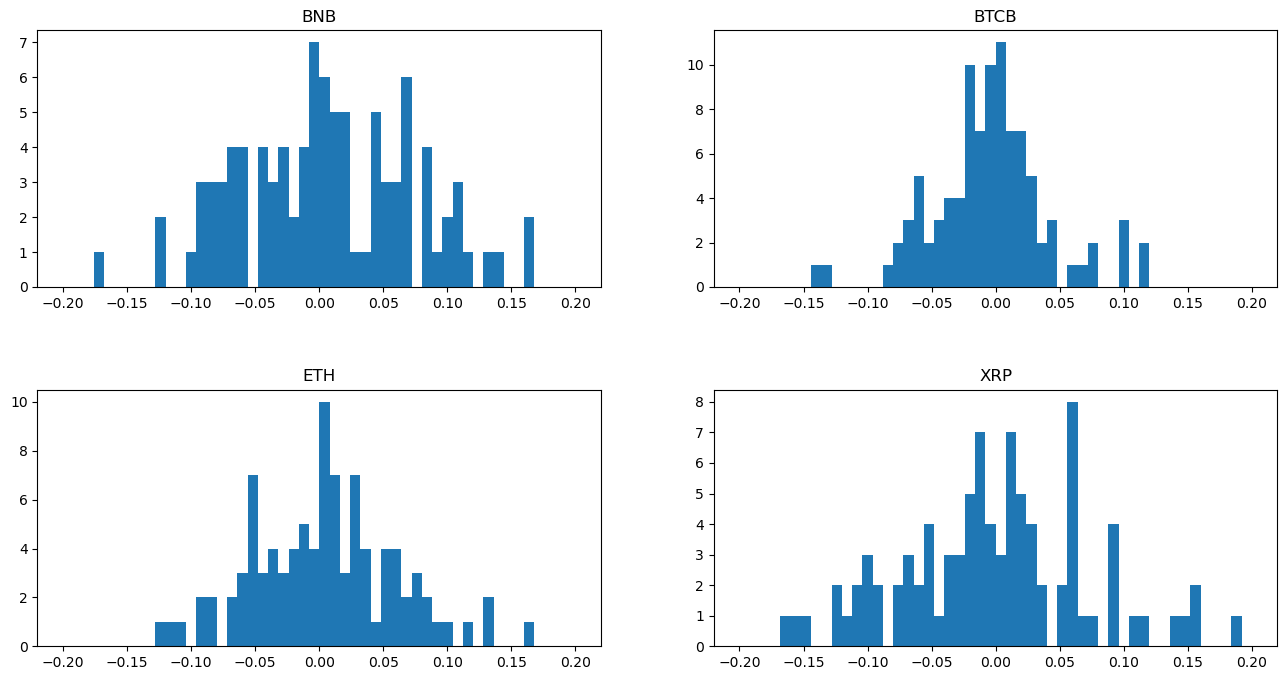

In [12]:
#ploting the histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.4, 'wspace': 0.2})
axs[0,0].hist(returns['BNB-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('BNB')
axs[0,1].hist(returns['BTC-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('BTCB')
axs[1,0].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('ETH')
axs[1,1].hist(returns['XRP-USD'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('XRP')
plt.show()

In [13]:
"""Cumulative return express the total change in the price of an asset over time.

We use the pandas cumprod() function to calculate the daily cumulative simple returns."""

#Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2021-03-14 00:00:00+00:00,-4.153481,-3.168961,-3.643250,-3.872817
2021-03-15 00:00:00+00:00,-7.766575,-8.712635,-6.909345,-4.863635
2021-03-16 00:00:00+00:00,-6.520725,-7.246832,-6.115993,0.581831
2021-03-17 00:00:00+00:00,-2.263579,-3.873403,-5.259877,2.716315
2021-03-18 00:00:00+00:00,-5.215377,-5.525790,-7.369013,2.825461


Text(0.5, 1.0, 'Cumulative Returns')

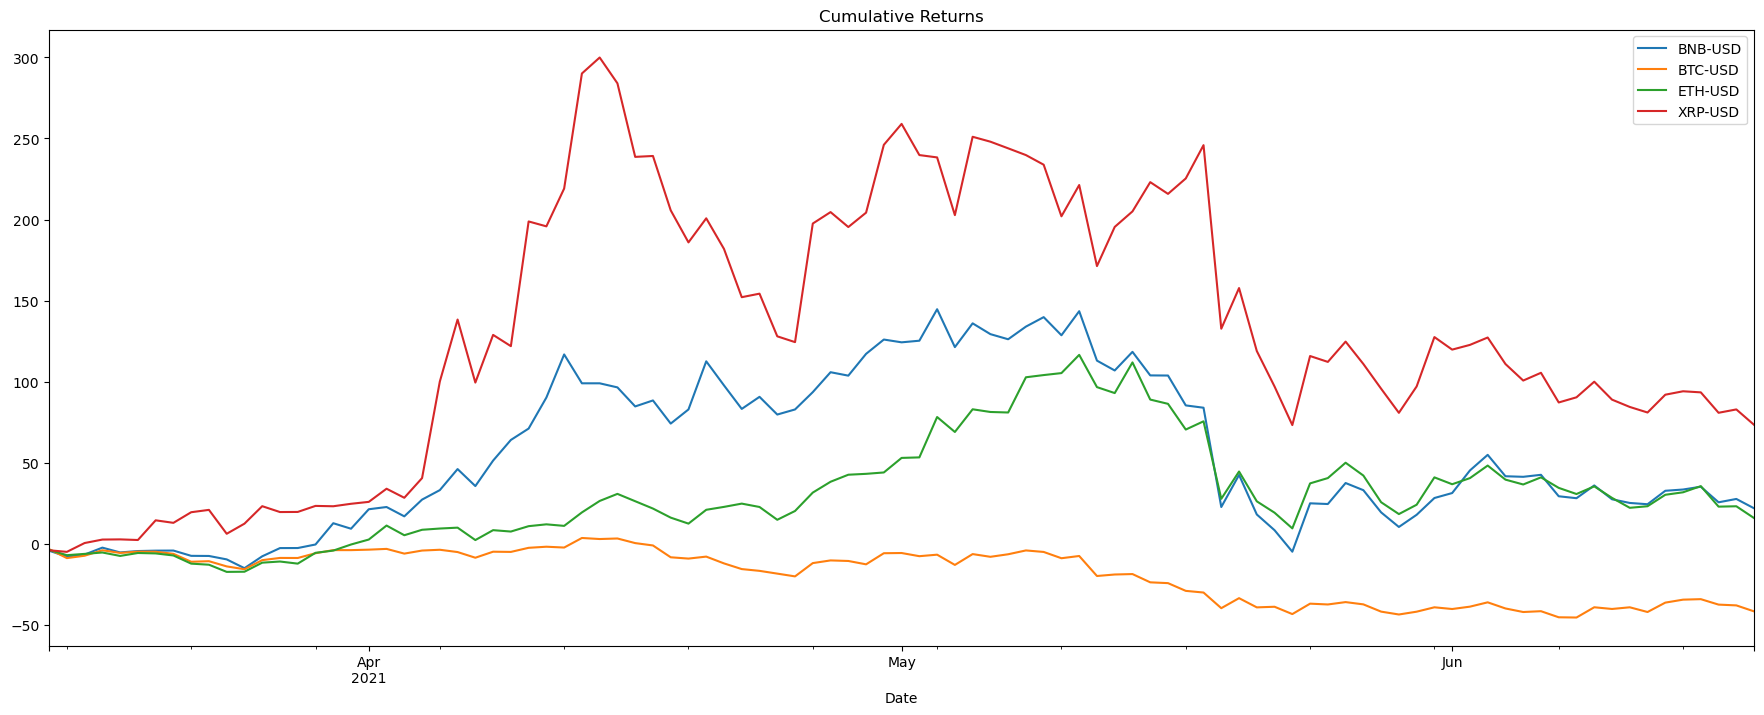

In [14]:
cum_returns.plot(figsize=(22,8))
plt.title('Cumulative Returns')

In [15]:
#compute the correlations
returns.corr()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
BNB-USD,1.000000,0.748915,0.792467,0.617731
BTC-USD,0.748915,1.000000,0.775570,0.672582
ETH-USD,0.792467,0.775570,1.000000,0.616548
XRP-USD,0.617731,0.672582,0.616548,1.000000


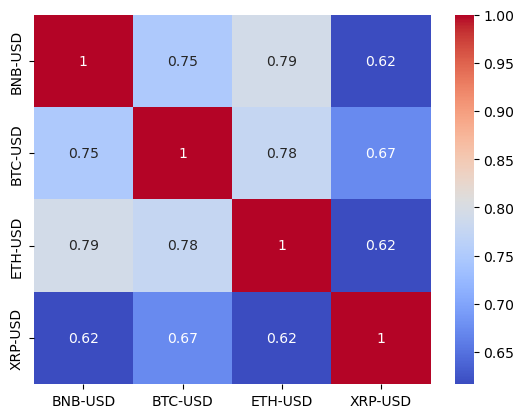

In [16]:
#plot the correlations
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()